# Traffic Sign Recognition

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from sklearn.metrics import accuracy_score
import PIL
from PIL import Image

In [2]:
# The classes which is represnting the traffic signs here. I have taken the dataset where I have total to 43 kinds of
# traffic signs. So that's why I am taking classes = 43

data = []
labels = []
classes = 43

cur_path = os.getcwd()
cur_path = cur_path + '/archive'

print(cur_path)

/Users/susovanpatra/Desktop/AI/Deep_Learning/archive


## Loading Dataset

In [3]:
for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image_path = os.path.join(path, img)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {image_path} - {e}")
            break

data = np.array(data)
labels = np.array(labels)

In [4]:
print("Shape of Data : ", data.shape)
print("Shape of Labels : ", labels.shape)

Shape of Data :  (39209, 30, 30, 3)
Shape of Labels :  (39209,)


In [5]:
labels = to_categorical(labels, 43)

## Train Test Split

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.3, random_state=42)

In [7]:
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)

print("Shape of X_valid : ", X_valid.shape)
print("Shape of y_valid : ", y_valid.shape)

Shape of X_train :  (27446, 30, 30, 3)
Shape of y_train :  (27446, 43)
Shape of X_valid :  (11763, 30, 30, 3)
Shape of y_valid :  (11763, 43)


## Model Creation

In [8]:
model = Sequential()
model.add(Input(X_train.shape[1:]))
          
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training & Validation

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [11]:
model_history = model.fit(X_train, y_train, batch_size = 64, epochs = 15, validation_data=(X_valid, y_valid))

Epoch 1/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.2629 - loss: 4.2098 - val_accuracy: 0.8371 - val_loss: 0.7278
Epoch 2/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.7251 - loss: 0.9475 - val_accuracy: 0.9318 - val_loss: 0.3100
Epoch 3/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.8337 - loss: 0.5575 - val_accuracy: 0.9643 - val_loss: 0.1546
Epoch 4/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.8799 - loss: 0.3988 - val_accuracy: 0.9731 - val_loss: 0.1159
Epoch 5/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.9151 - loss: 0.2897 - val_accuracy: 0.9699 - val_loss: 0.1091
Epoch 6/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.9251 - loss: 0.2619 - val_accuracy: 0.9751 - val_loss: 0.0947
Epoch 7/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.9290 - loss: 0.2309 - val_accuracy: 0.9838 - val_loss: 0.0636
Epoch 8/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9424 - loss: 0.1960 - 

In [12]:
print("Validation Accuracy : ",model_history.history['val_accuracy'][-1])
print("Validation Loss : ",model_history.history['val_loss'][-1])

Validation Accuracy :  0.9870781302452087
Validation Loss :  0.052440349012613297


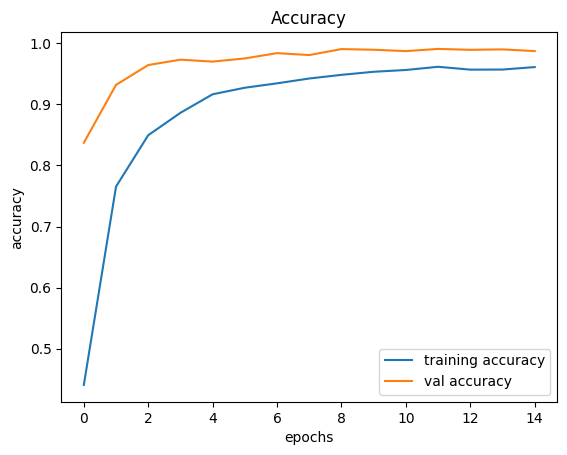

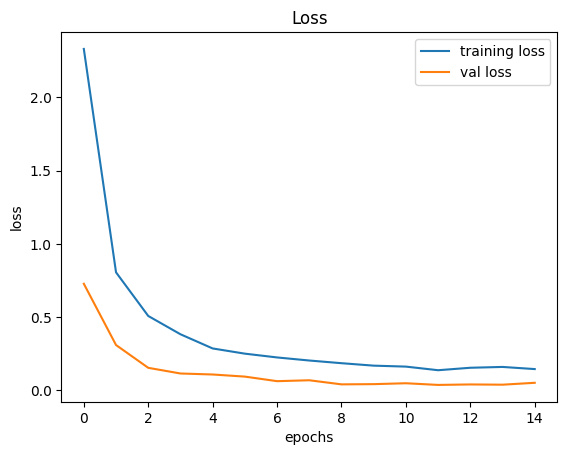

In [13]:
plt.figure(0)
plt.plot(model_history.history['accuracy'], label='training accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(model_history.history['loss'], label='training loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [14]:
# We got 99% validation accuracy,, Now let's check for Test Data

## Evaluate with Test data

In [15]:
test_data = []

path = os.path.join(cur_path, 'Test')
images = os.listdir(path)
images.sort()
for img in images:
    try:
        image_path = os.path.join(path, img)  
        image = Image.open(image_path)
        image = image.resize((30, 30))
        image = np.array(image)
        test_data.append(image)
    except PIL.UnidentifiedImageError as e:
        print(f"Error loading image: {image_path} - {e}")
        continue  
    except Exception as e:
        print(f"Error loading image: {image_path} - {e}")
        break

test_data = np.array(test_data)

Error loading image: /Users/susovanpatra/Desktop/AI/Deep_Learning/archive/Test/.DS_Store - cannot identify image file '/Users/susovanpatra/Desktop/AI/Deep_Learning/archive/Test/.DS_Store'


In [16]:
test_data.shape

(12630, 30, 30, 3)

In [17]:
nn = pd.read_csv('/Users/susovanpatra/Desktop/AI/Deep_Learning/archive/Test.csv')
y_actual = nn[['ClassId']]
y_actual.shape

(12630, 1)

In [18]:
y_predict = model.predict(test_data)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [19]:
y_predict = np.argmax(y_predict, axis = 1)
acc = accuracy_score(y_actual, y_predict)
print("Accuracy Score On Test Data : ", acc * 100)

Accuracy Score On Test Data :  95.04354711005543


In [20]:
# I got 95% accuracy on Test data